In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import pyqg

In [2]:
year = 24*60*60*360.
m = pyqg.QGModel(tmax=10*year, twrite=10000, tavestart=5*year)
m.run()

INFO:  Logger initialized
INFO:  Kernel initialized
INFO: Step: 10000, Time: 7.20e+07, KE: 3.71e-04, CFL: 0.090
INFO: Step: 20000, Time: 1.44e+08, KE: 4.38e-04, CFL: 0.090
INFO: Step: 30000, Time: 2.16e+08, KE: 4.58e-04, CFL: 0.089
INFO: Step: 40000, Time: 2.88e+08, KE: 4.71e-04, CFL: 0.101


In [3]:
m.describe_diagnostics()

NAME               | DESCRIPTION
--------------------------------------------------------------------------------
APEflux    | spectral flux of available potential energy           
APEgen     | total APE generation                                  
APEgenspec | spectrum of APE generation                            
EKE        | mean eddy kinetic energy                              
EKEdiss    | total energy dissipation by bottom drag               
Ensspec    | enstrophy spectrum                                    
KEflux     | spectral flux of kinetic energy                       
KEspec     |  kinetic energy spectrum                              
entspec    | barotropic enstrophy spectrum                         
q          | QGPV                                                  


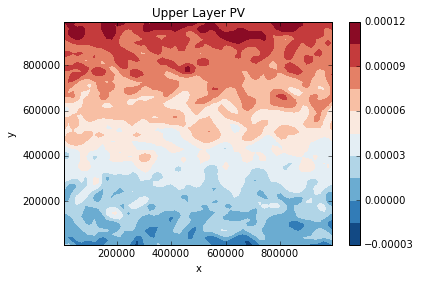

In [4]:
q_upper = m.q[0] + m.Qy[0]*m.y
plt.contourf(m.x, m.y, q_upper, 12, cmap='RdBu_r')
plt.xlabel('x'); plt.ylabel('y'); plt.title('Upper Layer PV')
plt.colorbar();

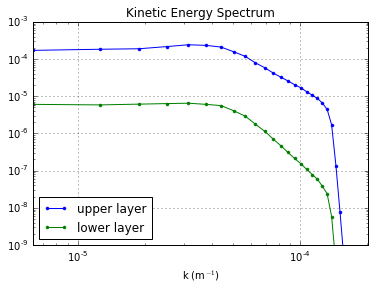

In [5]:
kespec_u = m.get_diagnostic('KEspec')[0].sum(axis=0)
kespec_l = m.get_diagnostic('KEspec')[1].sum(axis=0)
plt.loglog( m.kk, kespec_u, '.-' )
plt.loglog( m.kk, kespec_l, '.-' )
plt.legend(['upper layer','lower layer'], loc='lower left')
plt.ylim([1e-9,1e-3]); plt.xlim([m.kk.min(), m.kk.max()])
plt.xlabel(r'k (m$^{-1}$)'); plt.grid()
plt.title('Kinetic Energy Spectrum');

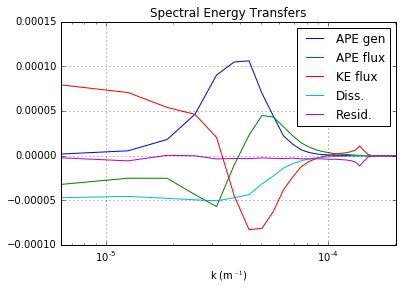

In [6]:
ebud = [ m.get_diagnostic('APEgenspec').sum(axis=0),
         m.get_diagnostic('APEflux').sum(axis=0),
         m.get_diagnostic('KEflux').sum(axis=0),
         -m.rek*m.del2*m.get_diagnostic('KEspec')[1].sum(axis=0)*m.M**2 ]
ebud.append(-np.vstack(ebud).sum(axis=0))
ebud_labels = ['APE gen','APE flux','KE flux','Diss.','Resid.']
[plt.semilogx(m.kk, term) for term in ebud]
plt.legend(ebud_labels, loc='upper right')
plt.xlim([m.kk.min(), m.kk.max()])
plt.xlabel(r'k (m$^{-1}$)'); plt.grid()
plt.title('Spectral Energy Transfers');

In [7]:
m.describe_diagnostics()

NAME               | DESCRIPTION
--------------------------------------------------------------------------------
APEflux    | spectral flux of available potential energy           
APEgen     | total APE generation                                  
APEgenspec | spectrum of APE generation                            
EKE        | mean eddy kinetic energy                              
EKEdiss    | total energy dissipation by bottom drag               
Ensspec    | enstrophy spectrum                                    
KEflux     | spectral flux of kinetic energy                       
KEspec     |  kinetic energy spectrum                              
entspec    | barotropic enstrophy spectrum                         
q          | QGPV                                                  
